In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
aux = pd.read_excel(r'E:\Documentos\bases\indice_conectar\hospitalar\hospitalar_dias.xlsx', 
                             sheet_name='base', dtype={'COD': str})

In [3]:
aux

,COD,Município,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,110001,Alta Floresta D'Oeste,-,-,-,-,-,-,-,-,22,4626,4939,5550,3264,18401
1,110037,Alto Alegre dos Parecis,-,-,-,-,-,-,-,-,-,1663,1114,1137,893,4807
2,110040,Alto Paraíso,-,-,-,-,-,-,-,-,19,1160,1111,1133,780,4203
3,110034,Alvorada D'Oeste,-,-,-,-,-,-,-,-,13,1830,2112,1657,1159,6771
4,110002,Ariquemes,-,-,-,-,-,-,-,-,202,15057,13265,14805,14068,57397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,522150,Turvânia,-,-,-,-,-,-,-,-,65,909,918,787,430,3109
1847,522155,Turvelândia,-,-,-,-,-,-,-,-,15,442,387,440,229,1513
1848,522185,Valparaíso de Goiás,-,-,-,-,-,-,-,-,-,-,-,118,801,919
1849,522205,Vicentinópolis,-,-,-,-,-,-,-,-,9,487,710,883,475,2564


## Descrição

In [4]:
#Seleciona apenas os anos 2017 a 2020
base = aux[['COD', 'Município', 2017, 2018, 2019, 2020]]

In [5]:
base = base.replace('-', np.nan)

In [6]:
print('Quantidade de municipios na base de dados: {0}'.format(len(base)))
print('Quantidade de municípios que não estão na base: {0}'.format(5568 - len(base)))

Quantidade de municipios na base de dados: 1851
Quantidade de municípios que não estão na base: 3717


In [7]:
print('Quantidade de municipios sem valor(zero) para cada ano')
print(base[[2017, 2018, 2019, 2020]].isna().sum())

Quantidade de municipios sem valor(zero) para cada ano
2017    147
2018    159
2019    161
2020    118
dtype: int64


In [8]:
#Municipios com somente um valor
base[base[[2017, 2018, 2019, 2020]].isna().sum(axis=1) >= 3]

,COD,Município,2017,2018,2019,2020
14,110100,Governador Jorge Teixeira,48.0000,nan,nan,nan
53,130083,Caapiranga,nan,nan,nan,"2,018.0000"
74,130400,Silves,nan,nan,nan,316.0000
235,210197,Boa Vista do Gurupi,nan,128.0000,nan,nan
271,210467,Governador Nunes Freire,nan,nan,nan,"6,490.0000"
...,...,...,...,...,...,...
1767,521040,Itaberaí,nan,nan,nan,564.0000
1778,521180,Jaraguá,"2,614.0000",nan,nan,nan
1791,521310,Mineiros,nan,nan,nan,"1,015.0000"
1810,521630,Paranaiguara,nan,nan,nan,429.0000


In [9]:
#Municipios com muita variação nos dados - 20 primeiros
base['cv'] = (base[[2017, 2018, 2019, 2020]].std(axis=1)) / (base[[2017, 2018, 2019, 2020]].mean(axis=1))
variação = base.sort_values('cv', ascending=False)

In [10]:
variação[variação['cv'] > 0.4]

,COD,Município,2017,2018,2019,2020,cv
559,231290,Sobral,"1,281.0000",758.0000,419.0000,"9,912.0000",1.4746
648,250090,Arara,436.0000,44.0000,71.0000,1.0000,1.4547
645,241490,Viçosa,118.0000,8.0000,3.0000,23.0000,1.4212
678,251200,Pocinhos,349.0000,2.0000,nan,nan,1.3981
51,130070,Boca do Acre,nan,nan,41.0000,"4,268.0000",1.3873
...,...,...,...,...,...,...,...
205,171660,Peixe,"1,104.0000","1,729.0000","1,004.0000",646.0000,0.4021
1666,510610,Nossa Senhora do Livramento,451.0000,359.0000,252.0000,168.0000,0.4017
1202,313920,Malacacheta,"5,798.0000","5,788.0000","1,888.0000","5,165.0000",0.4016
732,260470,Correntes,327.0000,568.0000,820.0000,425.0000,0.4004


In [11]:
base.describe()

,2017,2018,2019,2020,cv
count,"1,704.0000","1,692.0000","1,690.0000","1,733.0000","1,743.0000"
mean,"6,981.5698","7,200.7754","7,380.6320","6,034.8182",0.3096
std,"40,237.9325","38,715.1634","38,514.5593","32,899.5733",0.2285
min,2.0000,1.0000,1.0000,1.0000,0.0000
25%,551.5000,567.2500,592.2500,446.0000,0.1524
50%,"1,445.5000","1,533.5000","1,589.5000","1,171.0000",0.2492
75%,"3,534.7500","3,703.7500","3,692.0000","3,003.0000",0.3857
max,"1,156,248.0000","1,055,572.0000","1,030,615.0000","879,652.0000",1.4746


<AxesSubplot:>

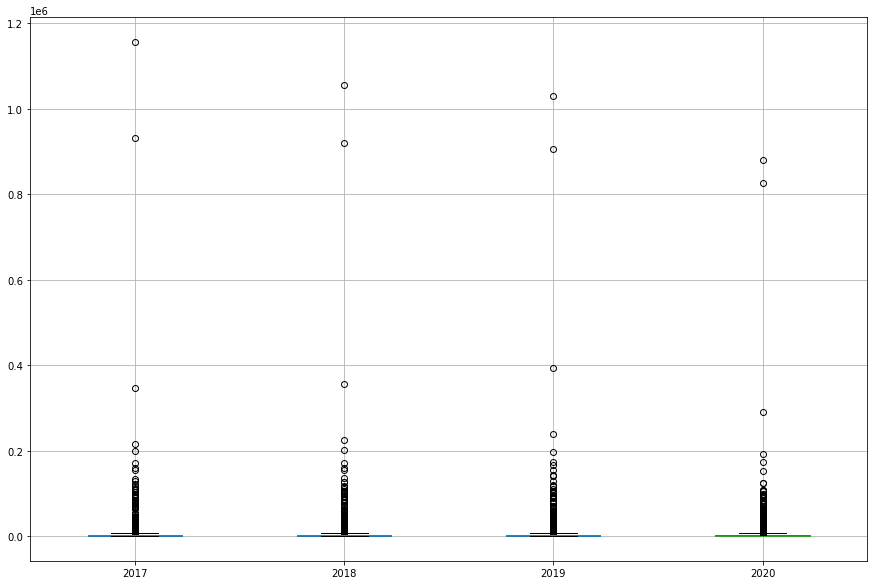

In [12]:
base[[2017, 2018, 2019, 2020]].boxplot(figsize=(15, 10))

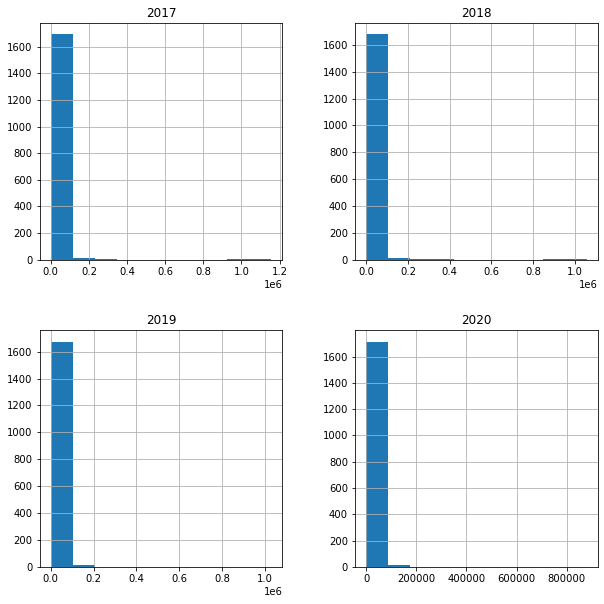

In [13]:
base[[2017, 2018, 2019, 2020]].hist(figsize=(10, 10));

## Razão Hospitalar / População
### Inclui tratamento dos municípios sem informação

In [14]:
hospitalar_aux = aux[['COD', 'Município', 2017, 2018, 2019, 2020]].copy()

In [15]:
#Renomeia as colunas
hospitalar_aux.rename(columns={'COD': 'COD 6', 2017: 'hosp_2017', 2018:'hosp_2018', 2019:'hosp_2019', 2020: 'hosp_2020'},
                    inplace=True)

In [16]:
#Base dados de TODOS OS MUNICÍPIOS e população
população = pd.read_excel(r'E:\Documentos\bases\indice_conectar\população\população_base.xlsx', dtype={'COD':str, 'COD 6': str})

#Merge das duas base
hospitalar = pd.merge(população, hospitalar_aux, left_on='COD 6', right_on='COD 6', how='left')

In [17]:
hospitalar = hospitalar.replace('-', np.nan)

In [18]:
#Municípios sem dados ou igual a zero
hospitalar[['hosp_2017', 'hosp_2018', 'hosp_2019','hosp_2020']].isna().sum()

hosp_2017    3864
hosp_2018    3876
hosp_2019    3878
hosp_2020    3835
dtype: int64

In [19]:
hospitalar['rz_2017'] = hospitalar['hosp_2017'] / hospitalar['pop_2017']
hospitalar['rz_2018'] = hospitalar['hosp_2018'] / hospitalar['pop_2018']
hospitalar['rz_2019'] = hospitalar['hosp_2019'] / hospitalar['pop_2019']
hospitalar['rz_2020'] = hospitalar['hosp_2020'] / hospitalar['pop_2020']

In [20]:
hospitalar['razão_hosp-pop'] = hospitalar[['rz_2017', 'rz_2018', 'rz_2019', 'rz_2020']].mean(axis=1, skipna=True)

In [21]:
hospitalar[['COD', 'pop_2017', 'pop_2018', 'pop_2019', 'pop_2020', 'hosp_2017', 'hosp_2018', 'hosp_2019',
       'hosp_2020', 'rz_2017', 'rz_2018', 'rz_2019', 'rz_2020', 'razão_hosp-pop']].sample(20)

,COD,pop_2017,pop_2018,pop_2019,pop_2020,hosp_2017,hosp_2018,hosp_2019,hosp_2020,rz_2017,rz_2018,rz_2019,rz_2020,razão_hosp-pop
5227,5103957,2964,3045,3026,3008,nan,nan,nan,nan,nan,nan,nan,nan,nan
4696,4304853,1547,1404,1377,1351,nan,nan,nan,nan,nan,nan,nan,nan,nan
5099,4323754,3422,3177,3133,3092,nan,nan,nan,nan,nan,nan,nan,nan,nan
1333,2507101,18715,18501,18664,18823,nan,nan,nan,nan,nan,nan,nan,nan,nan
875,2210656,9880,10024,10041,10058,nan,nan,nan,nan,nan,nan,nan,nan,nan
1010,2309003,14377,14485,14537,14549,"2,607.0000","2,825.0000","2,740.0000","2,471.0000",0.1813,0.1950,0.1885,0.1698,0.1837
1472,2600708,38267,38375,38386,38397,19.0000,8.0000,46.0000,142.0000,0.0005,0.0002,0.0012,0.0037,0.0014
4398,4205431,2549,2525,2510,2495,nan,nan,nan,nan,nan,nan,nan,nan,nan
1960,2911105,25912,25311,25591,25857,"1,815.0000","3,822.0000","5,029.0000","5,744.0000",0.0700,0.1510,0.1965,0.2221,0.1599
5212,5103205,32298,33224,33438,33649,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [22]:
## TRATAMENTO DOS VALORES
##Calculando valores da média para preencher NaN - ESTADO + CATEGORIA

#Criar id para fazer o cruzamento
hospitalar['id'] = hospitalar['UF'] + hospitalar['categoria'].astype(str)

#Calculando a média por estado e categoria-cidade
media = pd.pivot_table(hospitalar, index=['UF', 'categoria'], values=['razão_hosp-pop'], aggfunc=np.median).reset_index()

#Criando o id
media['id'] = media['UF'] + media['categoria'].astype(str)

#Preencendo o Nan
hospitalar_1 = hospitalar.fillna(hospitalar[['id']].join(media.set_index('id'), on='id'))

In [23]:
hospitalar_1[hospitalar_1['razão_hosp-pop'].isna()]

,UF,COD. UF,COD. MUNIC,COD,COD 6,NOME DO MUNICÍPIO,pop_2017,pop_2018,pop_2019,pop_2020,...,hosp_2017,hosp_2018,hosp_2019,hosp_2020,rz_2017,rz_2018,rz_2019,rz_2020,razão_hosp-pop,id
52,AC,12,13,1200013,120001,Acrelândia,14366,15020,15256,15490,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,AC7
53,AC,12,54,1200054,120005,Assis Brasil,6986,7300,7417,7534,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,AC7
54,AC,12,104,1200104,120010,Brasiléia,24765,25848,26278,26702,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,AC6
55,AC,12,138,1200138,120013,Bujari,9664,10111,10266,10420,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,AC7
56,AC,12,179,1200179,120017,Capixaba,11136,11456,11733,12008,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,AC7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,ES,32,5309,3205309,320530,Vitória,363140,358267,362097,365855,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,ES1
4346,SC,42,2404,4202404,420240,Blumenau,348513,352460,357199,361855,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,SC3
4397,SC,42,5407,4205407,420540,Florianópolis,485838,492977,500973,508826,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,SC1
4558,SC,42,16602,4216602,421660,São José,239718,242927,246586,250181,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,SC3


In [24]:
## TRATAMENTO DOS VALORES
##Calculando valores da média para preencher NaN - SOMENTE CATEGORIA

#Calculando a média por estado e categoria-cidade
media = pd.pivot_table(hospitalar, index=['categoria'], values=['razão_hosp-pop'], aggfunc=np.median).reset_index()

#Preencendo o Nan
hospitalar_1 = hospitalar.fillna(hospitalar[['categoria']].join(media.set_index('categoria'), on='categoria'))

#Removendo as colunas desnecessárias
#base_aux_1.drop(['munic_cod7', 'categoria', 'id'], axis=1, inplace=True)

In [25]:
hospitalar_1[hospitalar_1['razão_hosp-pop'].isna()]

,UF,COD. UF,COD. MUNIC,COD,COD 6,NOME DO MUNICÍPIO,pop_2017,pop_2018,pop_2019,pop_2020,...,hosp_2017,hosp_2018,hosp_2019,hosp_2020,rz_2017,rz_2018,rz_2019,rz_2020,razão_hosp-pop,id


In [26]:
hospitalar = hospitalar_1.copy()

In [27]:
#PESQUISA MUNICÍPIOS ESPECIFICOS
#hospitalar[hospitalar['COD'] == '3161908']

In [28]:
#Razão inversa
hospitalar['razão-inv_hosp-pop'] = round((1 - hospitalar['razão_hosp-pop']), 4)

In [29]:
base_hospitalar_completa = hospitalar[['UF', 'COD. UF', 'COD', 'COD 6', 'NOME DO MUNICÍPIO', 
                                       'razão_hosp-pop', 'razão-inv_hosp-pop']]

In [30]:
base_hospitalar_completa

,UF,COD. UF,COD,COD 6,NOME DO MUNICÍPIO,razão_hosp-pop,razão-inv_hosp-pop
0,RO,11,1100015,110001,Alta Floresta D'Oeste,0.1951,0.8049
1,RO,11,1100023,110002,Ariquemes,0.1327,0.8673
2,RO,11,1100031,110003,Cabixi,0.1302,0.8698
3,RO,11,1100049,110004,Cacoal,0.0671,0.9329
4,RO,11,1100056,110005,Cerejeiras,0.2068,0.7932
...,...,...,...,...,...,...,...
5563,GO,52,5221908,522190,Varjão,0.0697,0.9303
5564,GO,52,5222005,522200,Vianópolis,0.0697,0.9303
5565,GO,52,5222054,522205,Vicentinópolis,0.0737,0.9263
5566,GO,52,5222203,522220,Vila Boa,0.0290,0.9710


## Indicador

In [32]:
#Lista dos Consorciados
consorciados = pd.read_excel(r'E:\Documentos\bases\cadastro\base_municipios - Definitiva 2021.xlsx', dtype={'COD IBGE': str})


In [33]:
hospitalar_completa_aux = pd.merge(base_hospitalar_completa, consorciados[['COD IBGE', 'Consorciado']], 
                                     left_on='COD', right_on='COD IBGE')

In [34]:
#BASE GERAL HOSPITALAR CONSORCIO
hospitalar_completa_aux

,UF,COD. UF,COD,COD 6,NOME DO MUNICÍPIO,razão_hosp-pop,razão-inv_hosp-pop,COD IBGE,Consorciado
0,RO,11,1100015,110001,Alta Floresta D'Oeste,0.1951,0.8049,1100015,Não
1,RO,11,1100023,110002,Ariquemes,0.1327,0.8673,1100023,Sim
2,RO,11,1100031,110003,Cabixi,0.1302,0.8698,1100031,Não
3,RO,11,1100049,110004,Cacoal,0.0671,0.9329,1100049,Não
4,RO,11,1100056,110005,Cerejeiras,0.2068,0.7932,1100056,Não
...,...,...,...,...,...,...,...,...,...
5563,GO,52,5221908,522190,Varjão,0.0697,0.9303,5221908,Não
5564,GO,52,5222005,522200,Vianópolis,0.0697,0.9303,5222005,Não
5565,GO,52,5222054,522205,Vicentinópolis,0.0737,0.9263,5222054,Não
5566,GO,52,5222203,522220,Vila Boa,0.0290,0.9710,5222203,Não


In [35]:
#BASE CONSORCIADOS
hospitalar_consorcio = hospitalar_completa_aux[hospitalar_completa_aux['Consorciado'] == 'Sim']
hospitalar_consorcio = hospitalar_consorcio.drop('Consorciado', axis=1)
hospitalar_consorcio = hospitalar_consorcio.drop('COD IBGE', axis=1)

In [36]:
#MEDIA
#rz_total = hospitalar[['rz_2017', 'rz_2018','rz_2019', 'rz_2020']].sum().sum()
#contagem_total = hospitalar[['rz_2017', 'rz_2018','rz_2019', 'rz_2020']].count().sum()
#media_total = 1 - (rz_total / contagem_total)
#media_total

In [37]:
menor_c = hospitalar_consorcio['razão-inv_hosp-pop'].nsmallest(1).values[0]
menor_log_c = np.log10(menor_c)

print(menor_c)
print(menor_log_c)

0.4882
-0.3114022249188302


In [38]:
maior_c = hospitalar_consorcio['razão-inv_hosp-pop'].nlargest(1).values[0]
maior_log_c = np.log10(maior_c)

print(maior_c)
print(maior_log_c)

1.0
0.0


In [39]:
def indicador(x):
    y = (np.log10(x) - menor_log_c) / (maior_log_c - menor_log_c)
    y = round(y, 4)
    return y

In [40]:
hospitalar_consorcio['indicadorHOSP'] = hospitalar_consorcio['razão-inv_hosp-pop'].apply(lambda x: indicador(x))

In [41]:
hospitalar_consorcio.to_excel(r'E:\Documentos\bases\indice_conectar\hospitalar\indicador_hospitalar.xlsx', index=False)